# Model Deployment

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [3]:
import types 
from botocore.client import Config 
import ibm_boto3 
def __iter__(self): return 0 
# @hidden_cell 
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials. 
# You might want to remove those credentials before you share the notebook. 
client_d812e9ff73554acb99ec832832ddfe49 = ibm_boto3.client(service_name='s3', 
                                                           ibm_api_key_id='-rPWCJ6tlad28m4TQMS_rhBCiHbQ4d2agItYcfqgqzen', 
                                                           ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token", 
                                                           config=Config(signature_version='oauth'), 
                                                           endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')
body = client_d812e9ff73554acb99ec832832ddfe49.get_object(Bucket='progpy19cabd749c62e43b992119d84b67f744f',Key='Modeling Data Set for XYZ.xlsx')['Body'] 
# add missing __iter__ method, so pandas accepts body as file-like object 
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body ) 
df_data_1 = pd.read_excel(body)

In [42]:
df_data_0 = df_data_1 # We store the data in df_data_0 so that during coding if we change df_data_0 by mistake, it we need to reload data again,
                               #we can simply start from here rather than loading the once again.

In [44]:
#Data cleansing process involved several process such as checking emptiness, statistical properties, duplication, null values, shapes etc
df_data_0.head()
df_data_0.describe()
df_data_0.duplicated().sum()
df_data_0.empty
df_data_0.isna().sum()
Row, Col = df_data_0.shape
#print(f'The Data has {Row} rows and {Col} columns.') 

In [45]:
#Filtering out the null values as we have enough data and we don't need to compromise with the data quality by incorporating data imputation.
df_data_0 = df_data_0.dropna(axis=0, how='any')
df_data_0

,KEY,OPP_Natural Age,Age since SSM Validated,Age before SSM Validated,SSM_1 _ELXAPSED_DAYS,SSM_2 _ELXAPSED_DAYS,SSM_3 _ELXAPSED_DAYS,SSM_4 _ELXAPSED_DAYS,SSM_5 _ELXAPSED_DAYS,OPP_Backward count,...,Not_Roller_FLXAg,SAXMe_Quarter_Updater_FLXAg,Deal_Accelerator_FLXAg,One_Time_Roller_FLXAg,Record_Count,AGE_FLXAG,OUTCOME,BU_CODE,G_BU,Partition
0,23226186,49,49,0,0,0,0,0,49,0,...,1.0,0.0,0.0,0.0,1,1,0,XYZ,EXP_XYZ,1_Training
1,23244325,42,42,0,0,0,0,42,0,0,...,1.0,0.0,0.0,0.0,1,1,1,XYZ,AXM_XYZ,1_Training
2,23235268,45,45,0,0,0,0,45,0,0,...,1.0,0.0,0.0,0.0,1,1,1,XYZ,JXN_XYZ,1_Training
3,23235330,135,135,0,0,0,0,135,0,0,...,0.0,0.0,0.0,0.0,1,1,1,XYZ,CXG_XYZ,2_Testing
4,23235456,44,44,0,0,0,44,0,0,0,...,1.0,0.0,0.0,0.0,1,1,1,XYZ,AXS_XYZ,2_Testing
5,23236123,44,44,0,0,0,11,33,0,0,...,1.0,0.0,0.0,0.0,1,1,1,XYZ,JXN_XYZ,1_Training
6,23236219,136,63,73,0,73,63,0,0,0,...,0.0,0.0,0.0,1.0,1,1,1,XYZ,AXM_XYZ,2_Testing
7,23236893,44,44,0,0,0,0,44,0,0,...,1.0,0.0,0.0,0.0,1,1,1,XYZ,AXM_XYZ,1_Training
8,23237142,44,44,0,0,0,44,0,0,0,...,1.0,0.0,0.0,0.0,1,1,1,XYZ,EXP_XYZ,2_Testing
9,23237643,44,44,0,0,0,0,44,0,0,...,1.0,0.0,0.0,0.0,1,1,1,XYZ,AXM_XYZ,1_Training


In [46]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
enc.fit(df_data_0['G_BU'])
df_data_0['G_BU_transform'] = enc.transform(df_data_0['G_BU'])
df_data_0.columns

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Index(['KEY', 'OPP_Natural Age', 'Age since SSM Validated',
       'Age before SSM Validated', 'SSM_1 _ELXAPSED_DAYS',
       'SSM_2 _ELXAPSED_DAYS', 'SSM_3 _ELXAPSED_DAYS', 'SSM_4 _ELXAPSED_DAYS',
       'SSM_5 _ELXAPSED_DAYS', 'OPP_Backward count', 'OPP_Forward count',
       'DTL_Natural Age', 'RM_STATUS_Count', 'RdM_NIR_ELXAPSED_DAYS',
       'RdM_STR_ELXAPSED_DAYS', 'RdM_KEY_ELXAPSED_DAYS',
       'RdM_ATR_ELXAPSED_DAYS', 'RdM_SOL_ELXAPSED_DAYS', 'RdM_WNR_DAYS',
       'RdM_NonWNR_DAYS', 'RdM_Forward count', 'RdM backward count',
       'Forward quarter_count', 'Backward quarter_count', 'Roller_FLXAg_NUM',
       'Chronic_Roller_FLXAg', 'Not_Roller_FLXAg',
       'SAXMe_Quarter_Updater_FLXAg', 'Deal_Accelerator_FLXAg',
       'One_Time_Roller_FLXAg', 'Record_Count', 'AGE_FLXAG', 'OUTCOME',
       'BU_CODE', 'G_BU', 'Partition', 'G_BU_transform'],
      dtype='object')

In [47]:
#Split the training & test data
#Data comes with a column 'Partition' that indicates a segregates between Training data and Test data. This is done to compare results with others

df_data_train = df_data_0[df_data_0['Partition'] == "1_Training"]
df_data_test = df_data_0[df_data_0['Partition'] == "2_Testing"]

#Drop the columns not going to be used for the Modelling. Rest of the fields are numeric and going to be used during modelling.

df_data_train = df_data_train.drop(['BU_CODE','Partition', 'G_BU', 'KEY'], axis = 1)
df_data_test = df_data_test.drop(['BU_CODE','Partition', 'G_BU', 'KEY'], axis = 1)

In [48]:
# Segregate the train Data and target variables

X_train = df_data_train.drop(['OUTCOME'], axis = 1)
y_train = df_data_train['OUTCOME']

# Segregate the test Data and target variables
X_test = df_data_test.drop(['OUTCOME'], axis = 1)
y_test = df_data_test['OUTCOME']

In [49]:
#Function to plot ROC Curve
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()

# Random forest classifier

In [50]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rfc=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(X_train,y_train)

y_pred_rfc=rfc.predict(X_test)

In [51]:
#Calculate the accuracy
score_rfc = accuracy_score(y_test,y_pred_rfc)
print ("Accuracy:", round(score_rfc*100,0),"%", '\n')
print('Confusion Matrix','\n',confusion_matrix(y_test,y_pred_rfc))
print('\n')
print('Classification Report','\n',classification_report(y_test,y_pred_rfc))

Accuracy: 75.0 % 

Confusion Matrix 
 [[16135 12366]
 [ 7746 43501]]


Classification Report 
               precision    recall  f1-score   support

           0       0.68      0.57      0.62     28501
           1       0.78      0.85      0.81     51247

   micro avg       0.75      0.75      0.75     79748
   macro avg       0.73      0.71      0.71     79748
weighted avg       0.74      0.75      0.74     79748



AUC: 0.71


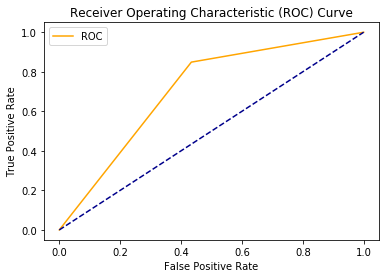

In [52]:
#Calculate ROC, fpr, TPR and threshold value
roc_valuerfc = roc_auc_score(y_test,y_pred_rfc)
print('AUC: %.2f' % roc_valuerfc)

fpr3, tpr3, thresholds3 = roc_curve(y_test,y_pred_rfc)
#Plot ROC 
plot_roc_curve(fpr3, tpr3)

In [59]:
y_test

3         1
4         1
6         1
8         1
12        1
14        1
16        1
17        1
18        1
20        1
21        1
23        1
24        0
26        0
28        1
31        0
33        1
34        1
35        1
41        0
42        0
43        0
48        0
49        1
50        0
57        1
61        1
64        1
67        0
68        1
         ..
161399    1
161400    1
161406    1
161408    1
161412    1
161414    1
161415    0
161416    1
161417    0
161421    1
161426    0
161427    1
161431    1
161433    1
161434    1
161435    1
161438    1
161440    1
161441    1
161442    1
161443    1
161445    1
161446    1
161448    1
161453    1
161454    0
161456    1
161457    0
161460    0
161463    0
Name: OUTCOME, Length: 79748, dtype: int64

In [66]:
y_Outcome = pd.DataFrame(y_pred_rfc)

df_data_out = X_test.reset_index()
df_data_out["Actual"] = y_test.reset_index()["OUTCOME"]
df_data_out["Prediction"] = y_Outcome.reset_index()[0]


,index,OPP_Natural Age,Age since SSM Validated,Age before SSM Validated,SSM_1 _ELXAPSED_DAYS,SSM_2 _ELXAPSED_DAYS,SSM_3 _ELXAPSED_DAYS,SSM_4 _ELXAPSED_DAYS,SSM_5 _ELXAPSED_DAYS,OPP_Backward count,...,Chronic_Roller_FLXAg,Not_Roller_FLXAg,SAXMe_Quarter_Updater_FLXAg,Deal_Accelerator_FLXAg,One_Time_Roller_FLXAg,Record_Count,AGE_FLXAG,G_BU_transform,Actual,Prediction
0,3,135,135,0,0,0,0,135,0,0,...,1.0,0.0,0.0,0.0,0.0,1,1,2,1,1
1,4,44,44,0,0,0,44,0,0,0,...,0.0,1.0,0.0,0.0,0.0,1,1,1,1,1
2,6,136,63,73,0,73,63,0,0,0,...,0.0,0.0,0.0,0.0,1.0,1,1,0,1,1
3,8,44,44,0,0,0,44,0,0,0,...,0.0,1.0,0.0,0.0,0.0,1,1,4,1,1
4,12,48,36,12,0,12,0,36,0,0,...,0.0,1.0,0.0,0.0,0.0,1,1,4,1,1
5,14,47,47,0,0,0,0,47,0,0,...,0.0,1.0,0.0,0.0,0.0,1,1,4,1,1
6,16,139,42,97,0,97,0,42,0,0,...,1.0,0.0,0.0,0.0,0.0,1,1,3,1,1
7,17,48,48,0,0,0,0,48,0,0,...,0.0,1.0,0.0,0.0,0.0,1,1,5,1,1
8,18,50,43,7,0,7,0,43,0,0,...,0.0,0.0,0.0,1.0,0.0,1,1,0,1,1
9,20,50,50,0,0,0,0,50,0,0,...,0.0,0.0,0.0,0.0,1.0,1,1,6,1,1


# Deploying the outcome to the Objetc storage using Project token ID.

In [69]:
#This is directly inserted from the top right three vertical dotted icon
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs. 
from project_lib import Project 
project = Project(project_id='41799493-7493-4323-a0c8-18d6a9437a1e', project_access_token='p-0e16a4f68d1452f5db09295ab29ff95c32ed4397') 
pc = project.project_context 

In [70]:
# you want to save in your object storage as a csv file
project.save_data("SalesDataPredicted.csv", df_data_out.to_csv(), overwrite = True)

{'file_name': 'SalesDataPredicted.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'progpy19cabd749c62e43b992119d84b67f744f',
 'asset_id': '07e82954-e2ab-4ccc-82d8-c00cc0dec607'}

# Feature Importance

In [41]:
# Extract feature importances

fi = pd.DataFrame({'feature': list(X_train.columns),'importance': rfc.feature_importances_}).sort_values('importance', ascending = False)

# Display

fi.head(20)

,feature,importance
10,DTL_Natural Age,0.101341
0,OPP_Natural Age,0.099794
1,Age since SSM Validated,0.097498
31,G_BU_transform,0.096610
5,SSM_3 _ELXAPSED_DAYS,0.089582
11,RM_STATUS_Count,0.061195
6,SSM_4 _ELXAPSED_DAYS,0.061082
18,RdM_NonWNR_DAYS,0.060184
13,RdM_STR_ELXAPSED_DAYS,0.050127
2,Age before SSM Validated,0.033713
